Nama : Ainur Rifqi 

Nim  : 210411100236

# UTS Penambangan Data

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode Naive Bayes Classifier

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

**Implementasi Dengan metode Naive Bayes Classifier**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/rifqi-522/datamining/main/dataR2.csv')
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['Classification'].values

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [6]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [8]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2]


In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  1]
 [ 9  4]]


In [10]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum())) 

Correct predictions:  14
False predictions 10


Accuracy of the Naive Bayes Clasification is:  0.5833333333333334


**Implementasi dengan metode pohon keputusan (Desision tree)**

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [12]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/rifqi-522/datamining/main/dataR2.csv')
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [14]:
dataset['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [17]:
# Missing Value in Variabel

dataset.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [19]:
# Declare feature vector and target variable
X = dataset.drop(['Classification'], axis=1)

y = dataset['Classification']

In [20]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [21]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((77, 9), (39, 9))

In [22]:
# check data types in X_train

X_train.dtypes

Age              int64
BMI            float64
Glucose          int64
Insulin        float64
HOMA           float64
Leptin         float64
Adiponectin    float64
Resistin       float64
MCP.1          float64
dtype: object

In [23]:
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 870 kB/s 


In [25]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=["Age",	"BMI",	"Glucose",	"Insulin",	"HOMA",	"Leptin",	"Adiponectin",	"Resistin",	"MCP.1"])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [26]:
X_train.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
28,1,1,1,1,1,1,1,1,1
44,2,2,2,2,2,2,2,2,2
111,3,3,3,3,3,3,3,3,3
5,4,4,3,4,4,4,4,4,4
95,4,5,4,5,5,5,5,5,5


In [27]:
X_test.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
83,2.0,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,30.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
42,29.0,-1.0,22.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
40,10.0,-1.0,17.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
10,37.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [28]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [29]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [30]:
y_pred_gini = clf_gini.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4615


In [32]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2])

In [33]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7143


In [34]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7143
Test set score: 0.4615


[Text(0.5555555555555556, 0.875, 'X[1] <= 31.5\ngini = 0.49\nsamples = 77\nvalue = [33, 44]'),
 Text(0.3333333333333333, 0.625, 'X[2] <= 22.5\ngini = 0.478\nsamples = 33\nvalue = [20, 13]'),
 Text(0.2222222222222222, 0.375, 'X[5] <= 26.5\ngini = 0.458\nsamples = 31\nvalue = [20, 11]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.488\nsamples = 26\nvalue = [15, 11]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.625, 'X[2] <= 41.5\ngini = 0.416\nsamples = 44\nvalue = [13, 31]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 1.5\ngini = 0.402\nsamples = 43\nvalue = [12, 31]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.387\nsamples = 42\nvalue = [11, 31]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

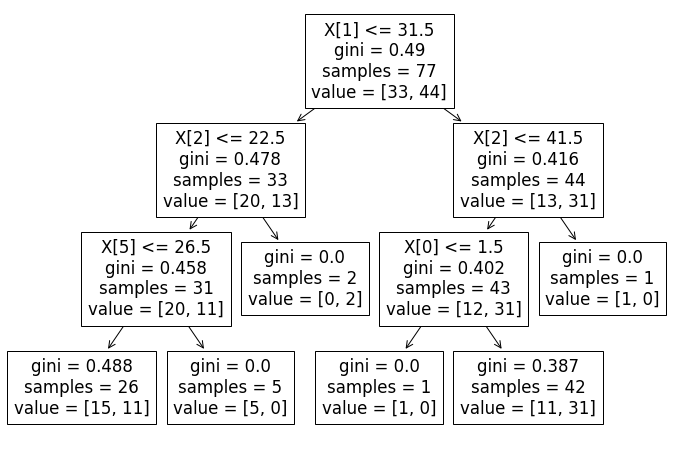

In [35]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 